In [1]:
from sklearn.compose import ColumnTransformer
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('loan_approval_dataset.csv')

In [3]:
df.head()

,Age,Salary,Credit_Score,Loan_Amount,Loan_Term,Employment_Status,Residence_Type,Previous_Default,Loan_Approved
0,56,136748,584,38209,36 months,Employed,Owned,Yes,Yes
1,46,25287,815,27424,24 months,Self-Employed,Rented,No,Yes
2,32,146593,398,42396,12 months,Unemployed,Rented,Yes,Yes
3,60,54387,696,11370,24 months,Unemployed,Owned,No,No
4,25,28512,788,14528,12 months,Employed,Owned,No,No


In [4]:
df['Loan_Term'].value_counts()

Loan_Term
12 months    264
24 months    252
36 months    251
48 months    233
Name: count, dtype: int64

<Axes: >

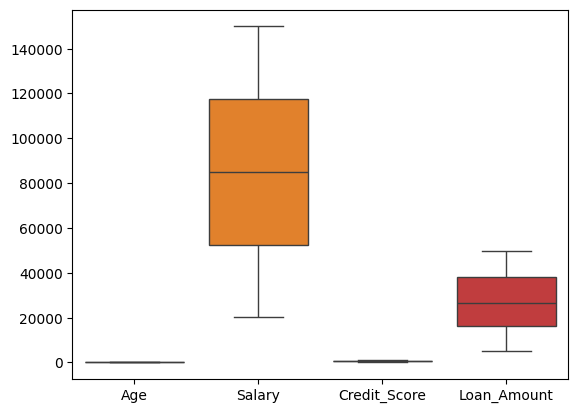

In [5]:
sns.boxplot(df)

In [6]:
X = df.drop(columns='Loan_Approved')
y = df.Loan_Approved

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size=0.8,random_state=42)

### Preprocessing fit_transform()

In [8]:
# compose = ColumnTransformer(transformers=[
#     ('name of preprocessing method',Instance of Preprocessing like - >StandardScaler(),column names),
#     ('name of preprocessing method',Instance of Preprocessing like - >OneHotEncoder(),column names),
#     ('name of preprocessing method',Instance of Preprocessing like - >PolynomialFeatures(),column names)
# ])

In [9]:
num_cols = X.select_dtypes(include='number').columns
obj_cols = X.select_dtypes(exclude='number').columns

In [10]:
num_cols

Index(['Age', 'Salary', 'Credit_Score', 'Loan_Amount'], dtype='object')

In [11]:
obj_cols

Index(['Loan_Term', 'Employment_Status', 'Residence_Type', 'Previous_Default'], dtype='object')

In [12]:
df.columns

Index(['Age', 'Salary', 'Credit_Score', 'Loan_Amount', 'Loan_Term',
       'Employment_Status', 'Residence_Type', 'Previous_Default',
       'Loan_Approved'],
      dtype='object')

In [13]:
compose = ColumnTransformer(
    transformers=[
        ('scaling',StandardScaler(),num_cols),
        ('encoding',OneHotEncoder(),obj_cols)
    ],remainder='drop'
)
compose.fit_transform(df)

array([[ 1.11288175,  1.35351736,  0.04865542, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.3716524 , -1.57299909,  1.51383627, ...,  1.        ,
         1.        ,  0.        ],
       [-0.6660687 ,  1.61200737, -1.13110059, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-1.03668337, -0.54161215, -1.75269246, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.48349643, -1.40343805, -0.54756536, ...,  0.        ,
         1.        ,  0.        ],
       [-1.62966685, -1.0283978 ,  1.51383627, ...,  0.        ,
         0.        ,  1.        ]], shape=(1000, 16))

In [14]:
compose = ColumnTransformer(
    transformers=[
        ('scaling',StandardScaler(),num_cols),
        ('encoding',OneHotEncoder(),obj_cols)
    ],remainder='passthrough'
)
compose.fit_transform(df)

array([[1.1128817500082018, 1.3535173637964144, 0.04865542121409337, ...,
        0.0, 1.0, 'Yes'],
       [0.37165239739850314, -1.5729990872839834, 1.5138362712278461,
        ..., 1.0, 0.0, 'Yes'],
       [-0.666068696255075, 1.6120073689182643, -1.1311005878878893, ...,
        0.0, 1.0, 'Yes'],
       ...,
       [-1.0366833725599243, -0.5416121516621948, -1.7526924636512995,
        ..., 0.0, 1.0, 'Yes'],
       [1.483496426313051, -1.4034380458338152, -0.5475653575793817, ...,
        1.0, 0.0, 'Yes'],
       [-1.6296668546476831, -1.028397798686989, 1.5138362712278461, ...,
        0.0, 1.0, 'No']], shape=(1000, 17), dtype=object)

In [15]:
# xtrain = compose.fit_transform(xtrain)
# xtest = compose.transform(xtest)

In [20]:
num_cols

Index(['Age', 'Salary', 'Credit_Score', 'Loan_Amount'], dtype='object')

In [ ]:
compose = ColumnTransformer(
    transformers=[
        ('scaling',StandardScaler(),num_cols),
        # ('scaling1',StandardScaler(),num_cols),
    ],remainder='drop'
)
compose.fit_transform(df)

array([[ 1.11288175,  1.35351736,  0.04865542,  0.86178168],
       [ 0.3716524 , -1.57299909,  1.51383627,  0.02044773],
       [-0.6660687 ,  1.61200737, -1.13110059,  1.18840804],
       ...,
       [-1.03668337, -0.54161215, -1.75269246,  0.07747278],
       [ 1.48349643, -1.40343805, -0.54756536,  1.69453457],
       [-1.62966685, -1.0283978 ,  1.51383627, -0.4054849 ]],
      shape=(1000, 4))

In [21]:
df

,Age,Salary,Credit_Score,Loan_Amount,Loan_Term,Employment_Status,Residence_Type,Previous_Default,Loan_Approved
0,56,136748,584,38209,36 months,Employed,Owned,Yes,Yes
1,46,25287,815,27424,24 months,Self-Employed,Rented,No,Yes
2,32,146593,398,42396,12 months,Unemployed,Rented,Yes,Yes
3,60,54387,696,11370,24 months,Unemployed,Owned,No,No
4,25,28512,788,14528,12 months,Employed,Owned,No,No
...,...,...,...,...,...,...,...,...,...
995,22,49241,500,41020,24 months,Self-Employed,Owned,No,Yes
996,40,116214,423,12415,48 months,Self-Employed,Owned,No,Yes
997,27,64569,300,28155,36 months,Self-Employed,Rented,Yes,Yes
998,61,31745,490,48884,12 months,Self-Employed,Mortgage,No,Yes


In [ ]:
from sklearn.impute import SimpleImputer

